<a href="https://colab.research.google.com/github/piyushrockzz/ExcelR-Projects-/blob/main/Assignment_12_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
data=pd.read_csv("/content/SalaryData_Test.csv")

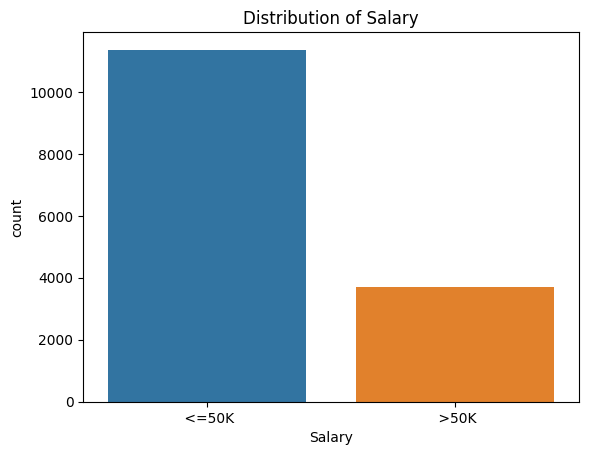

In [5]:
# Exploratory Data Analysis
# Distribution of salary
sns.countplot(x="Salary", data=data)
plt.title("Distribution of Salary")
plt.show()

<ipython-input-6-7f78b301ef88>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")


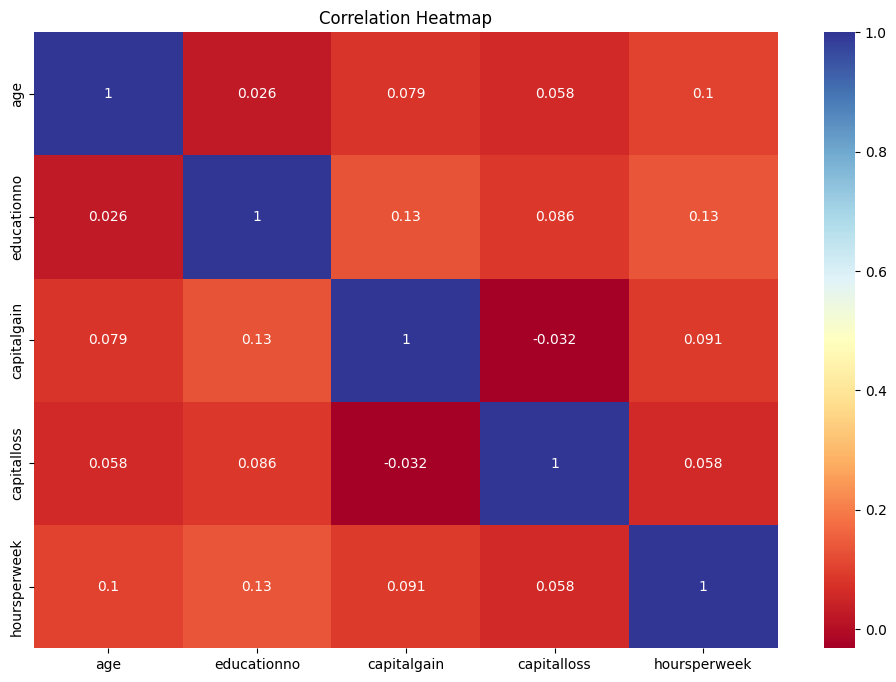

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
# Preprocessing the data
# Drop any missing values
data = data.dropna()

In [8]:
# Convert categorical variables to numerical using one-hot encoding
categorical_features = ["workclass", "education", "maritalstatus", "occupation", "relationship", "race", "sex", "native"]
data = pd.get_dummies(data, columns=categorical_features)

In [9]:
# Splitting the data into training and testing sets
X = data.drop("Salary", axis=1)
y = data["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

# Training the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
# Making predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [12]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8107569721115537


In [13]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

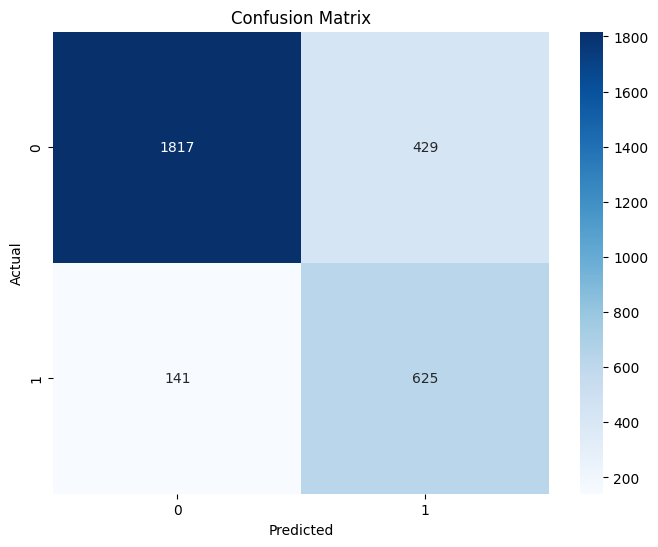

In [14]:

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
# Classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      2246
        >50K       0.59      0.82      0.69       766

    accuracy                           0.81      3012
   macro avg       0.76      0.81      0.78      3012
weighted avg       0.84      0.81      0.82      3012

